I built a linear regression model from scratch using Python, incorporating three distinct datasets: salaries vs years of experience, and student_score vs hours of study.
The results produced by our custom model is compared with sci-kit learn's model.
Below are the code snippets I implemented using different methods

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [173]:
x=np.array([1, 2, 3, 4, 5])
y=np.array([5.3, 6.6,7.3,8.5,9.6])
n=len(x)

data = pd.DataFrame([x, y])
data = data.T
data.columns = (['x', 'y'])
print(data)

     x    y
0  1.0  5.3
1  2.0  6.6
2  3.0  7.3
3  4.0  8.5
4  5.0  9.6


Graphics Utility

In [174]:
def plot_data(
    x, y, title, xlabel, ylabel, a_s=None, b_s=None, labels=None, colors=None
):
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if a_s and b_s:
        if not labels:
            labels = ["" for a in a_s]
        if not colors:
            colors = ["C0" for a in a_s]
        # fig,ax  = plt.subplots()
        for a, b, color, label in zip(a_s, b_s, colors, labels):
            ax.axline((0, b), slope=a, color=color, label=label)
            ax.legend()

    fig.show()
    plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15968\3446528056.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


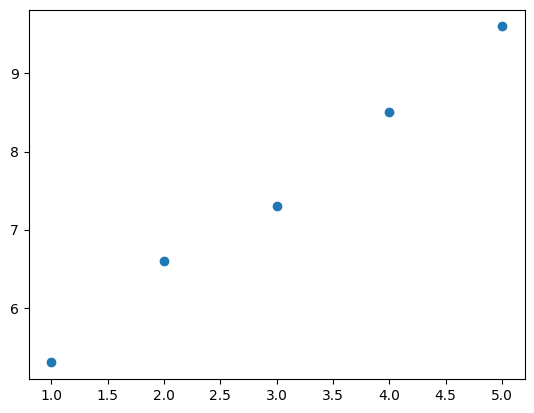

In [175]:
fig,ax  = plt.subplots()
ax.scatter(x,y)
fig.show()

In [176]:
x_mean,y_mean = np.mean(x),np.mean(y)
a = np.sum((x-x_mean)*(y-y_mean))/np.sum((x-x_mean)**2)
b = y_mean - a*x_mean

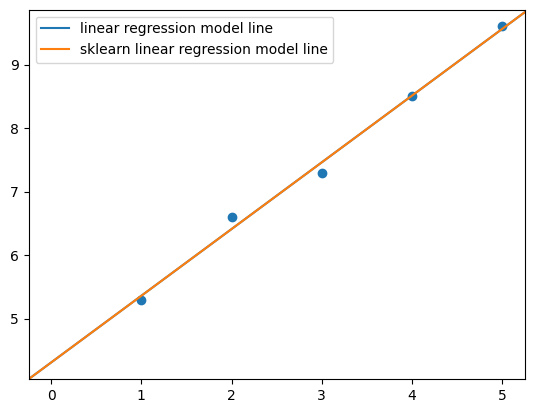

In [177]:
fig,ax  = plt.subplots()
ax.scatter(x,y)
ax.axline((0,b),slope=a,color='C0',label='linear regression model line')

# ax.legend()

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit([[x_i] for x_i in x],y)
#reg.intercept_,reg.coef_
ax.axline((0,reg.intercept_),slope=reg.coef_[0],color='C1',label='sklearn linear regression model line')
ax.legend()
plt.show()

In [178]:
reg.score(X=[[x_i] for x_i in x],y=[[y_i] for y_i in y])

0.9939596105301118

In [179]:
def r_squared(x:np.array,y:np.array,n:int,a:float,b:float):
    y_mean = np.sum(y)/n
    rss = np.sum((y-(a*x+b))**2)
    tss = np.sum((y-y_mean)**2)

    return 1 - rss/tss

In [180]:
class SimpleLinearRegressor():
    def fit(self,x,y):
        x_mean,y_mean = np.mean(x),np.mean(y)
        self.a = np.sum((x-x_mean)*(y-y_mean))/np.sum((x-x_mean)**2)
        self.b = y_mean - self.a*x_mean

    def predict(self,x:np.array):
        # n = len(x)
        y = a*x + b
        return y

    def score(self,x,y):
        return r_squared(x,y,len(x),self.a,self.b)

Applications

In [181]:
import pandas as pd

In [182]:
score_df = pd.read_csv("data/score.csv")
score_df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [183]:
x_train,x_test,y_train,y_test = train_test_split(score_df["Hours"],score_df["Scores"],test_size=0.5,random_state=42)

In [184]:
np.array(x_train)

array([8.5, 3.5, 2.7, 1.9, 4.8, 6.1, 7.8, 5.5, 7.7, 1.1, 7.4, 9.2])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15968\1717252663.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


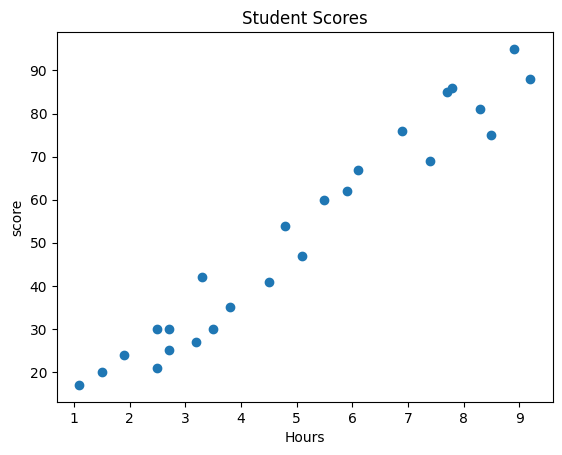

In [185]:
plot_data(score_df["Hours"],score_df["Scores"],title="Student Scores",xlabel="Hours",ylabel="score")

In [186]:
custom_reg = SimpleLinearRegressor()
custom_reg.fit(x_train,y_train)

sk_reg = LinearRegression()
sk_reg.fit([[x_i] for x_i in x_train],y_train)
#reg.intercept_,reg.coef_


LinearRegression()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15968\1717252663.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


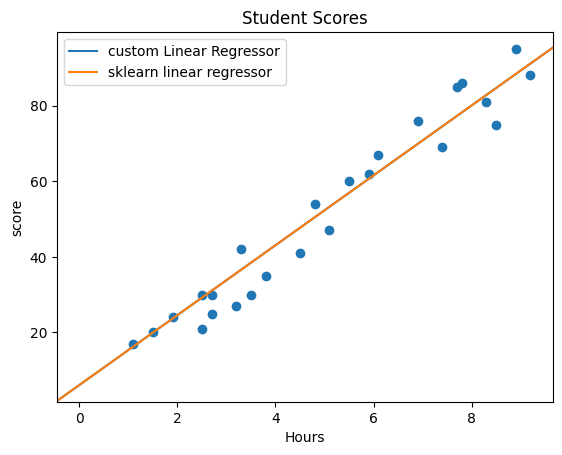

In [187]:
plot_data(score_df["Hours"],score_df["Scores"],title="Student Scores",xlabel="Hours",ylabel="score",a_s= [custom_reg.a,sk_reg.coef_[0]],b_s=[custom_reg.b,sk_reg.intercept_],labels=["custom Linear Regressor","sklearn linear regressor"],colors=['C0','C1'])

As you can see, our model's predictions, coincide with that of sci-kit learn's

In [188]:
sk_reg.score([[xi] for xi in x_test],y_test)

0.9426307007429557

In [189]:
custom_reg.score(x_test,y_test)

0.9426307007429557

In [190]:
salary_df = pd.read_csv("data/Salary_Data.csv")
salary_df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [191]:
x_train,x_test,y_train,y_test = train_test_split(salary_df["YearsExperience"],salary_df["Salary"],test_size=0.5,random_state=42)

In [192]:
np.array(x_train)

array([ 7.9,  1.3,  1.5,  9. ,  2. ,  7.1,  9.5,  5.9, 10.5,  6.8,  3.2,
        3.9,  4.5,  6. ,  3. ])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15968\1717252663.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


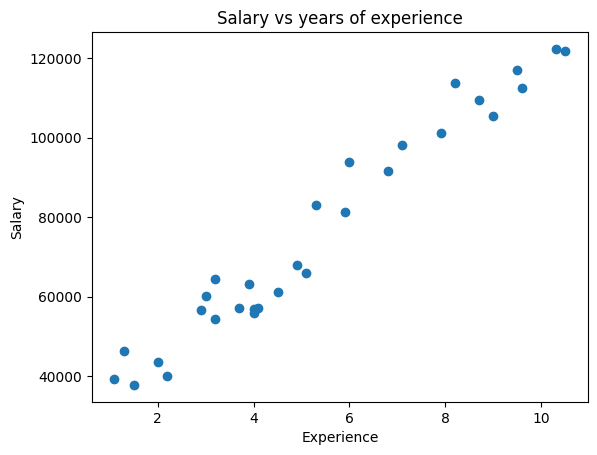

In [196]:
plot_data(salary_df["YearsExperience"],salary_df["Salary"],title="Salary vs years of experience",xlabel="Experience",ylabel="Salary")

In [197]:
custom_reg = SimpleLinearRegressor()
custom_reg.fit(x_train,y_train)

sk_reg = LinearRegression()
sk_reg.fit([[x_i] for x_i in x_train],y_train)
#reg.intercept_,reg.coef_


LinearRegression()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15968\1717252663.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


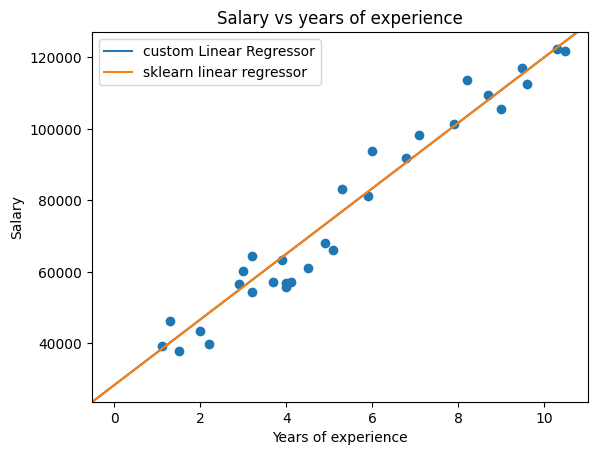

In [199]:
plot_data(salary_df["YearsExperience"],salary_df["Salary"],title="Salary vs years of experience",xlabel="Years of experience",ylabel="Salary",a_s= [custom_reg.a,sk_reg.coef_[0]],b_s=[custom_reg.b,sk_reg.intercept_],labels=["custom Linear Regressor","sklearn linear regressor"],colors=['C0','C1'])

In [200]:
sk_reg.score([[xi] for xi in x_test],y_test)

0.940087016255447

In [201]:
custom_reg.score(x_test,y_test)

0.940087016255447